In [1]:
import polars as pl
import matplotlib.pyplot as plt
import numpy as np
pl.Config.set_tbl_cols(100)

polars.config.Config

In [23]:
df = pl.read_csv("./dataset/clean_movies.csv")
df = df.with_columns(
    pl.col("Release Date").str.to_date()
)
df.head()

idx,Title,Movie Info,Year,Distributor,Budget (in $),Domestic Opening (in $),Domestic Sales (in $),International Sales (in $),World Wide Sales (in $),Release Date,Genre,Running Time,License
i64,str,str,i64,str,i64,i64,i64,i64,i64,date,str,i64,str
0,"""Avatar""","""A paraplegic Marine dispatched…",2009,"""Twentieth Century Fox""",237000000,77025481,785221649,2138484377,2923706026,2009-12-16,"""['Action', 'Adventure', 'Fanta…",162,"""PG-13"""
1,"""Avengers: Endgame""","""After the devastating events o…",2019,"""Walt Disney Studios Motion Pic…",356000000,357115007,858373000,1941066100,2799439100,2019-04-24,"""['Action', 'Adventure', 'Drama…",181,"""PG-13"""
2,"""Avatar: The Way of Water""","""Jake Sully lives with his newf…",2022,"""20th Century Studios""",null,134100226,684075767,1636174514,2320250281,2019-04-24,"""['Action', 'Adventure', 'Drama…",181,"""PG-13"""
3,"""Titanic""","""A seventeen-year-old aristocra…",1997,"""Paramount Pictures""",200000000,28638131,674292608,1590450697,2264743305,1997-12-19,"""['Drama', 'Romance']""",194,"""PG-13"""
4,"""Star Wars: Episode VII - The F…","""As a new threat to the galaxy …",2015,"""Walt Disney Studios Motion Pic…",245000000,247966675,936662225,1134647993,2071310218,2015-12-16,"""['Action', 'Adventure', 'Sci-F…",138,"""PG-13"""


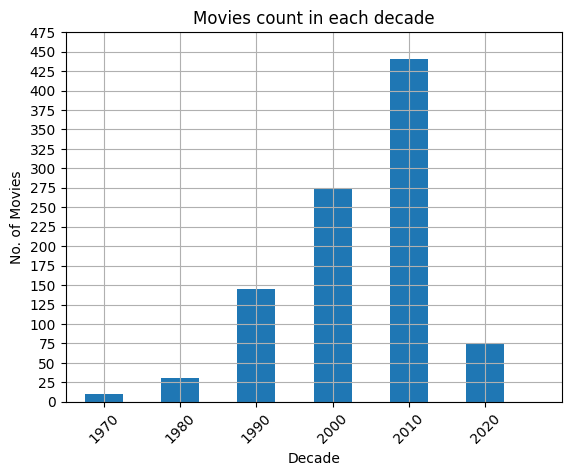

In [87]:
df2 = df.with_columns(
    ((pl.col("Year")) // 10 * 10).alias("Decade")
)
group_year = df2.group_by("Decade", maintain_order=True).agg(pl.col("Title").count()).sort(by="Decade", descending=False)

plt.bar(group_year["Decade"], group_year["Title"], width=5)
plt.xticks(np.arange(1970, group_year["Decade"].max() + 10, 10), rotation = 45) 
plt.xlim(1965, 2030)
plt.xlabel("Decade")
plt.ylabel("No. of Movies")
plt.title("Movies count in each decade")
plt.grid()
plt.yticks(np.arange(0, 500, 25))
plt.show()

In [29]:
#Highest Budget 

df.filter(
    pl.col("Budget (in $)") == pl.col("Budget (in $)").max()
)

idx,Title,Movie Info,Year,Distributor,Budget (in $),Domestic Opening (in $),Domestic Sales (in $),International Sales (in $),World Wide Sales (in $),Release Date,Genre,Running Time,License
i64,str,str,i64,str,i64,i64,i64,i64,i64,date,str,i64,str
1,"""Avengers: Endgame""","""After the devastating events o…",2019,"""Walt Disney Studios Motion Pic…",356000000,357115007,858373000,1941066100,2799439100,2019-04-24,"""['Action', 'Adventure', 'Drama…",181,"""PG-13"""


In [30]:
#Highest Earning

df.filter(
    pl.col("World Wide Sales (in $)") == pl.col("World Wide Sales (in $)").max()
)

idx,Title,Movie Info,Year,Distributor,Budget (in $),Domestic Opening (in $),Domestic Sales (in $),International Sales (in $),World Wide Sales (in $),Release Date,Genre,Running Time,License
i64,str,str,i64,str,i64,i64,i64,i64,i64,date,str,i64,str
0,"""Avatar""","""A paraplegic Marine dispatched…",2009,"""Twentieth Century Fox""",237000000,77025481,785221649,2138484377,2923706026,2009-12-16,"""['Action', 'Adventure', 'Fanta…",162,"""PG-13"""


In [16]:
df.head()

idx,Title,Movie Info,Year,Distributor,Budget (in $),Domestic Opening (in $),Domestic Sales (in $),International Sales (in $),World Wide Sales (in $),Release Date,Genre,Running Time,License
i64,str,str,i64,str,i64,i64,i64,i64,i64,date,str,i64,str
0,"""Avatar""","""A paraplegic Marine dispatched…",2009,"""Twentieth Century Fox""",237000000,77025481,785221649,2138484377,2923706026,2009-12-16,"""['Action', 'Adventure', 'Fanta…",162,"""PG-13"""
1,"""Avengers: Endgame""","""After the devastating events o…",2019,"""Walt Disney Studios Motion Pic…",356000000,357115007,858373000,1941066100,2799439100,2019-04-24,"""['Action', 'Adventure', 'Drama…",181,"""PG-13"""
2,"""Avatar: The Way of Water""","""Jake Sully lives with his newf…",2022,"""20th Century Studios""",null,134100226,684075767,1636174514,2320250281,2019-04-24,"""['Action', 'Adventure', 'Drama…",181,"""PG-13"""
3,"""Titanic""","""A seventeen-year-old aristocra…",1997,"""Paramount Pictures""",200000000,28638131,674292608,1590450697,2264743305,1997-12-19,"""['Drama', 'Romance']""",194,"""PG-13"""
4,"""Star Wars: Episode VII - The F…","""As a new threat to the galaxy …",2015,"""Walt Disney Studios Motion Pic…",245000000,247966675,936662225,1134647993,2071310218,2015-12-16,"""['Action', 'Adventure', 'Sci-F…",138,"""PG-13"""


#### Count for different Licenses

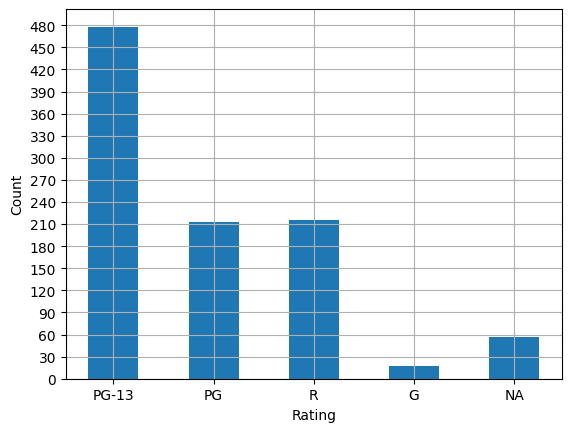

In [92]:
group_ratings = df.group_by("License", maintain_order=True).agg(pl.col("Title").count())

plt.bar(group_ratings["License"], group_ratings["Title"], width=0.5)
plt.xlabel("Rating")
plt.ylabel("Count")
plt.yticks(np.arange(0, 500, 30))
plt.grid()
plt.show()

#### Highest World Wide Sales (in $)

In [70]:
df.sort(
    by="World Wide Sales (in $)", descending=True
)[0:5].select(
    pl.col("Title", "World Wide Sales (in $)")
)

Title,World Wide Sales (in $)
str,i64
"""Avatar""",2923706026
"""Avengers: Endgame""",2799439100
"""Avatar: The Way of Water""",2320250281
"""Titanic""",2264743305
"""Star Wars: Episode VII - The F…",2071310218


#### Highest International Sales (in $)

In [71]:
df.sort(
    by="International Sales (in $)", descending=True
)[0:5].select(
    pl.col("Title", "International Sales (in $)")
)

Title,International Sales (in $)
str,i64
"""Avatar""",2138484377
"""Avengers: Endgame""",1941066100
"""Avatar: The Way of Water""",1636174514
"""Titanic""",1590450697
"""Avengers: Infinity War""",1373599557


#### Highest Domestic Sales (in $)

In [72]:
df.sort(
    by="Domestic Sales (in $)", descending=True
)[0:5].select(
    pl.col("Title", "Domestic Sales (in $)")
)

Title,Domestic Sales (in $)
str,i64
"""Star Wars: Episode VII - The F…",936662225
"""Avengers: Endgame""",858373000
"""Spider-Man: No Way Home""",814115070
"""Avatar""",785221649
"""Top Gun: Maverick""",718732821


#### Creating a profit column

In [111]:
df3 = df.drop_nulls(subset=["Budget (in $)"]) 
df3 = df3.with_columns(
    (pl.col("World Wide Sales (in $)") - pl.col("Budget (in $)")).alias("Profit (in $)")
)

In [115]:
df3.filter(
    pl.col("Profit (in $)") < 0
)

idx,Title,Movie Info,Year,Distributor,Budget (in $),Domestic Opening (in $),Domestic Sales (in $),International Sales (in $),World Wide Sales (in $),Release Date,Genre,Running Time,License,Profit (in $)
i64,str,str,i64,str,i64,i64,i64,i64,i64,date,str,i64,str,i64
153,"""Man of Steel""","""An alien child is evacuated fr…",2013,"""Warner Bros.""",225000000,116619362,291045518,377000000,218045517,2013-06-12,"""['Action', 'Adventure', 'Sci-F…",143,"""PG-13""",-6954483
160,"""Men in Black 3""","""Agent J travels in time to M.I…",2012,"""Sony Pictures Entertainment (S…",225000000,54592779,179020854,475192631,204213484,2012-05-23,"""['Action', 'Adventure', 'Comed…",106,"""PG-13""",-20786516
181,"""Transformers: The Last Knight""","""A deadly threat from Earth's h…",2017,"""Paramount Pictures""",217000000,44680073,130168683,475256474,171425156,2017-06-21,"""['Action', 'Adventure', 'Sci-F…",154,"""PG-13""",-45574844
184,"""Tangled""","""The magically long-haired Rapu…",2010,"""Walt Disney Studios Motion Pic…",260000000,48767052,200821936,391640880,72462815,2010-11-24,"""['Adventure', 'Animation', 'Co…",100,"""PG""",-187537185
185,"""Quantum of Solace""","""James Bond descends into myste…",2008,"""Sony Pictures Entertainment (S…",200000000,67528882,168368427,421212055,189580481,2008-10-31,"""['Action', 'Adventure', 'Myste…",106,"""PG-13""",-10419519
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
982,"""The Haunted Mansion""","""A realtor and his wife and chi…",2003,"""Walt Disney Studios Motion Pic…",90000000,24278410,75847266,106443000,2290265,2003-11-26,"""['Comedy', 'Family', 'Fantasy'…",99,"""PG""",-87709735
987,"""Poseidon""","""On New Year's Eve, the luxury …",2006,"""Warner Bros.""",160000000,22155410,60674817,121000000,-138325184,2006-05-10,"""['Action', 'Adventure', 'Thril…",98,"""PG-13""",-298325184
992,"""Road to Perdition""","""A mob enforcer's son in 1930s …",2002,"""DreamWorks Distribution""",80000000,22079481,104454762,76546716,21001477,2002-07-12,"""['Crime', 'Drama', 'Thriller']""",117,"""R""",-58998523
